# market segmentation in clustering

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

from sklearn.cluster import KMeans

# load the data

In [41]:
data=pd.read_csv(r'C:\Users\user\Desktop\market segmentation clustering.csv')
data.head()

,Satisfaction,Loyalty
0,1,-1.4
1,3,-1.4
2,5,-1.4
3,3,-1.6
4,4,-1.6


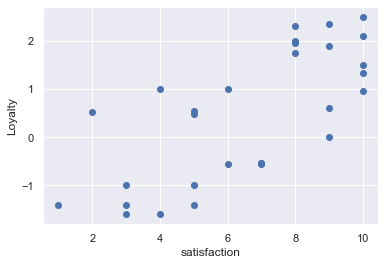

In [42]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.ylabel('Loyalty')
plt.xlabel('satisfaction')
plt.show()

In [43]:
data_clustered=data.copy()


In [53]:
kmeans=KMeans(2)
kmeans.fit(data_clustered)


KMeans(n_clusters=2)

In [66]:
data_clustered['Cluster pred']=kmeans.fit_predict(data_clustered)
data_clustered.head()

,Satisfaction,Loyalty,Cluster pred
0,1,-1.4,0
1,3,-1.4,0
2,5,-1.4,0
3,3,-1.6,0
4,4,-1.6,0


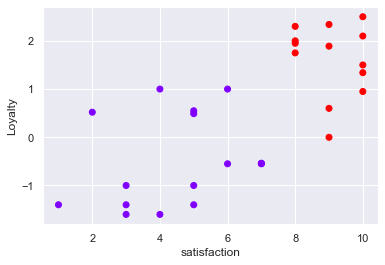

In [67]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=data_clustered['Cluster pred'],cmap='rainbow')
plt.ylabel('Loyalty')
plt.xlabel('satisfaction')
plt.show()

# standardising the variable

In [49]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(data_clustered)
x_scaled


array([[-2.10088636, -1.3832446 , -0.59222421],
       [-1.34871717, -1.3832446 , -0.59222421],
       [-0.59654798, -1.3832446 ,  1.46871605],
       [-1.34871717, -1.53236762, -0.59222421],
       [-0.97263258, -1.53236762, -0.59222421],
       [-1.34871717, -1.08499855, -0.59222421],
       [-0.59654798, -1.08499855,  1.46871605],
       [-1.72480177,  0.04833643, -0.59222421],
       [-0.97263258,  0.40623168,  1.46871605],
       [-0.59654798,  0.02596797,  1.46871605],
       [-0.59654798,  0.07070488,  1.46871605],
       [-0.22046338,  0.40623168,  1.46871605],
       [-0.22046338, -0.74947175,  0.78173596],
       [ 0.15562121, -0.74947175,  0.78173596],
       [ 0.15562121, -0.7420156 ,  0.78173596],
       [ 0.15562121, -0.7420156 ,  0.78173596],
       [ 0.53170581,  1.37553134,  0.09475587],
       [ 1.283875  ,  0.77903924, -1.2792043 ],
       [ 0.53170581,  1.1518468 ,  0.09475587],
       [ 0.53170581,  1.11456604,  0.09475587],
       [ 0.53170581,  0.96544302,  0.094

# how many cluster we should have?? take advantage of elbow method

In [50]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss    

F:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[87.0,
 38.369412251151104,
 19.73778473457155,
 11.746160831221852,
 7.684509374266303,
 5.856936931340673,
 4.0736489433940575,
 2.6662480042338403,
 1.9492979151685548]

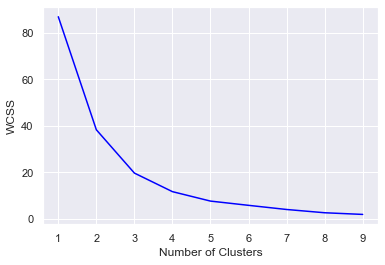

In [51]:
plt.plot(range(1,10),wcss,c='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# new cluster data

In [63]:
kmeans_new=KMeans(6)
kmeans_new.fit(x_scaled)

KMeans(n_clusters=6)

In [64]:
new_data_clustered=data_clustered.copy()
new_data_clustered['Cluster pred']=kmeans_new.fit_predict(x_scaled)

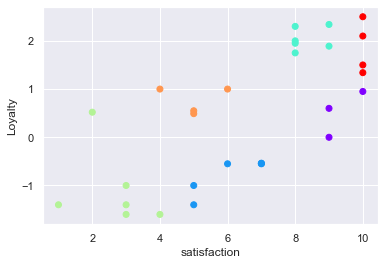

In [65]:
plt.scatter(new_data_clustered['Satisfaction'],new_data_clustered['Loyalty'],c=new_data_clustered['Cluster pred'],cmap='rainbow')
plt.ylabel('Loyalty')
plt.xlabel('satisfaction')
plt.show()